# Add topic
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    RAIN_BOOL,
    TEMPERATURE,
    YEAR,
    RAIN_VALUE,
)


## Load and prepare data

In [2]:
df_base, df_rain_train, df_rain_bool_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv")

Found 718955 parkings in zone


## Create pipelines and train models

#

mean squared error for model base: 5370.3038262355285
mean squared error for model rain: 5371.597217969549
mean squared error for model rain boolean: 5373.569996725211
mean squared error for model temperature: 5588.752636422963


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['temperature', 'year'])])),
                ('regressor', LinearRegression())])

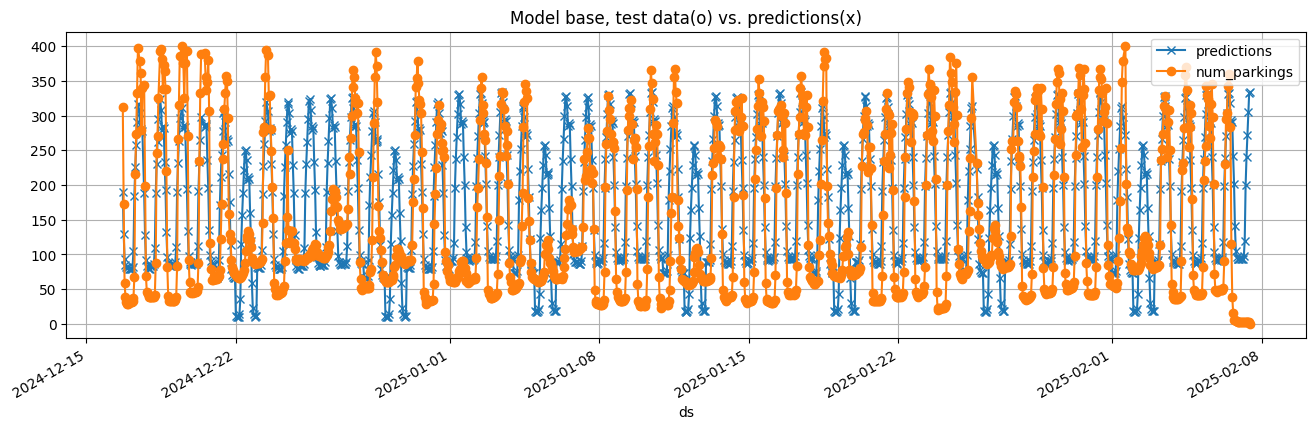

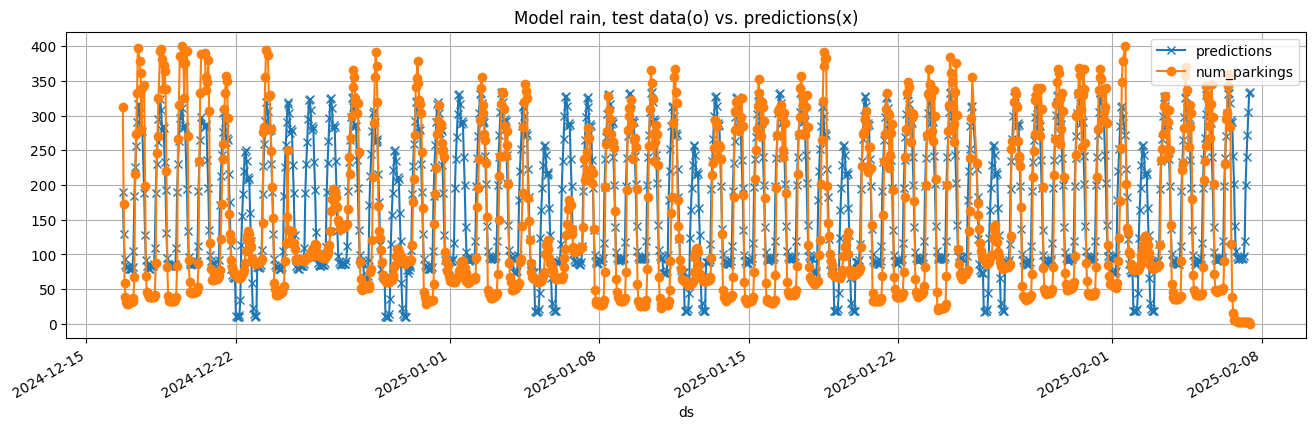

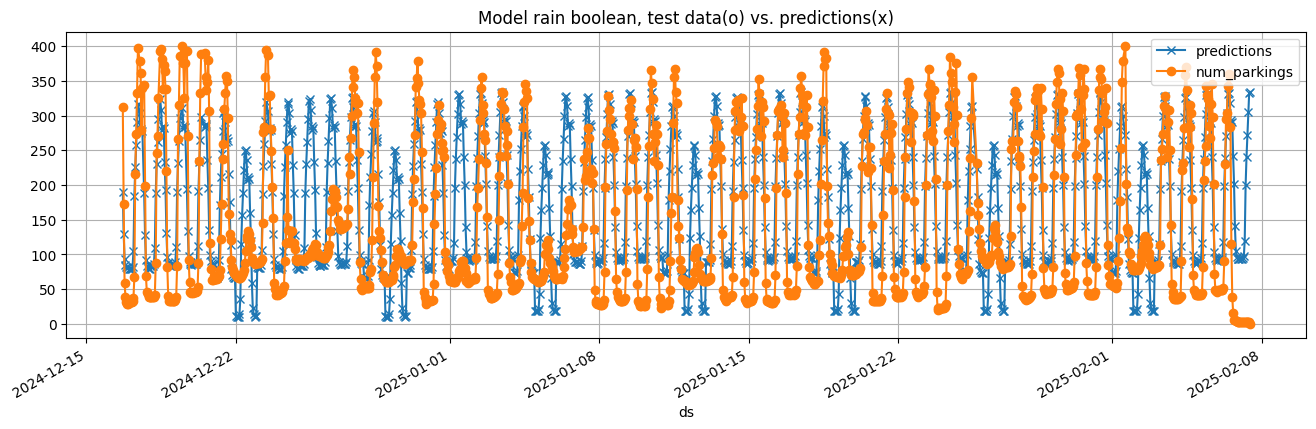

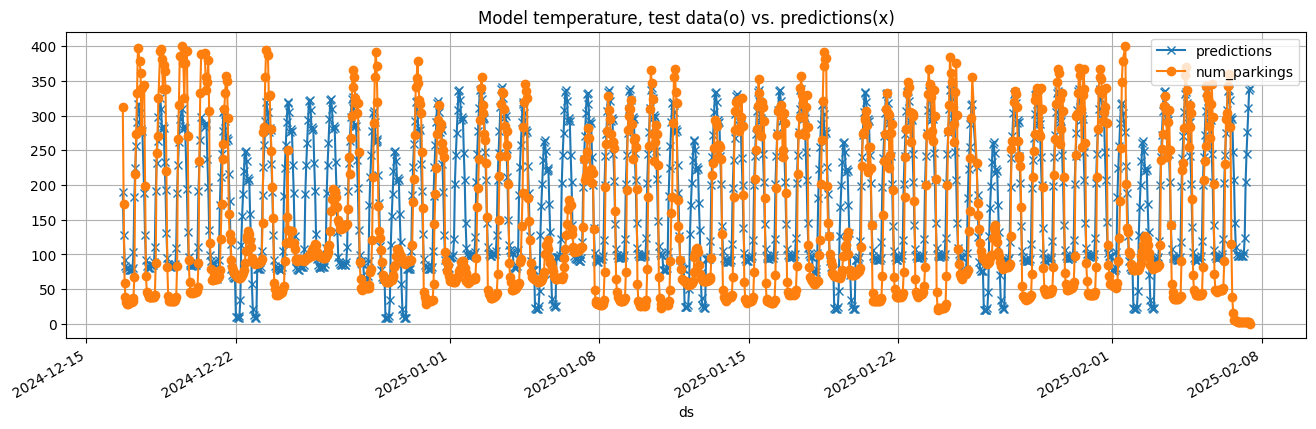

In [3]:
pipeline = get_pipeline(LinearRegression(), standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test, model_name=BASE)
pipeline_rain = get_pipeline(LinearRegression(), standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN)
pipeline_rain_bool = get_pipeline(LinearRegression(), standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain_bool, df_rain_bool_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain_bool, X_test, y_test, model_name=RAIN_BOOL)
pipeline_temperature = get_pipeline(LinearRegression(), standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test, model_name=TEMPERATURE)

## Make predictions

In [4]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=RAIN_VALUE)
results[RAIN_BOOL] = predict(pipeline_rain_bool, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 124360.
Forecast for parkings in rain: 121404.  Diff to base -2956 (-2.38%)
Forecast for parkings in rain boolean: 118411.  Diff to base -5949 (-4.78%)
Forecast for parkings in dry weather: 124444.  Diff to base 84 (0.07%)
Forecast for parkings in -20 degrees temperature: 132747.  Diff to base 8387 (6.74%)
Forecast for parkings in -10 degrees temperature: 130162.  Diff to base 5802 (4.67%)
Forecast for parkings in 0 degrees temperature: 127578.  Diff to base 3218 (2.59%)
Forecast for parkings in 10 degrees temperature: 124994.  Diff to base 634 (0.51%)
Forecast for parkings in 20 degrees temperature: 122409.  Diff to base -1951 (-1.57%)


## Conclusions
### Model Comparison
Mean squared error (model accuracy):
* Model base: 5370
* Model rain: 5372
* Model rain boolean: 5373
* Model temperature: 5588 

The performance metrics for all models are nearly identical and worse than with MLPRegression.

### Weather Impact Analysis 
Weather impace was measured by forecasting 30 days in future with given static weather values.  Forecast total cars is a sum of all hourly cars in the 30 day period. 

| Condition                         | Forecast  | Diff to Base | Diff (%)  |
|-----------------------------------|----------|-------------|----------|
| Base Forecast                     | 124,360  | -           | -        |
| Rain                               | 121,404  | -2,956      | -2.38%   |
| Rain (Boolean)                     | 118,411  | -5,949      | -4.78%   |
| Dry Weather                        | 124,444  | 84          | 0.07%    |
| -20°C Temperature                  | 132,747  | 8,387       | 6.74%    |
| -10°C Temperature                  | 130,162  | 5,802       | 4.67%    |
| 0°C Temperature                    | 127,578  | 3,218       | 2.59%    |
| 10°C Temperature                   | 124,994  | 634         | 0.51%    |
| 20°C Temperature                   | 122,409  | -1,951      | -1.57%   |

### Key Insights
1. **Rain Reduces Parkings**
   - Regular rain decreases parkings by **2.38%** (-2,956).
   - A stricter rain boolean measure leads to an even greater decrease of **4.78%** (-5,949).
   - This suggests that more severe or persistent rain has a stronger negative impact.

2. **Cold Weather Increases Parkings**
   - Parkings increase as the temperature drops:
     - **-20°C**: +6.74% (+8,387)
     - **-10°C**: +4.67% (+5,802)
     - **0°C**: +2.59% (+3,218)
 
3. **Warm Weather Slightly Decreases Parkings**
   - **10°C**: +0.51% (+634)
   - **20°C**: -1.57% (-1,951)
   - This suggests that in warmer weather, people may opt for other transportation options, such as walking or biking.

4. **Dry Weather Has Minimal Impact**
   - Forecast for dry weather is nearly identical to the base forecast, with only a **0.07%** (+84) difference.
   - This implies that dry conditions don’t significantly influence parking behavior.


## Draw predictions

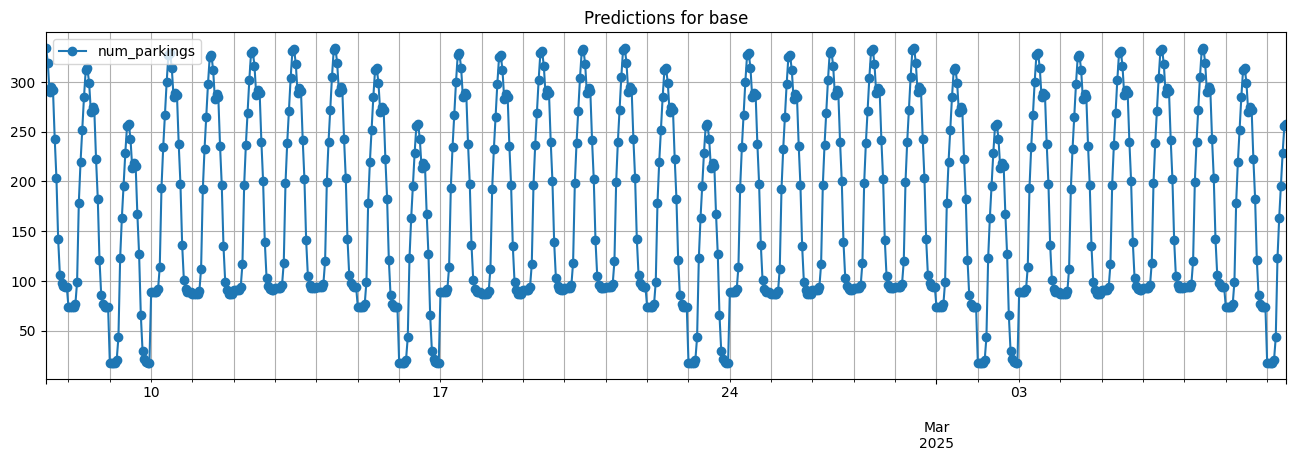

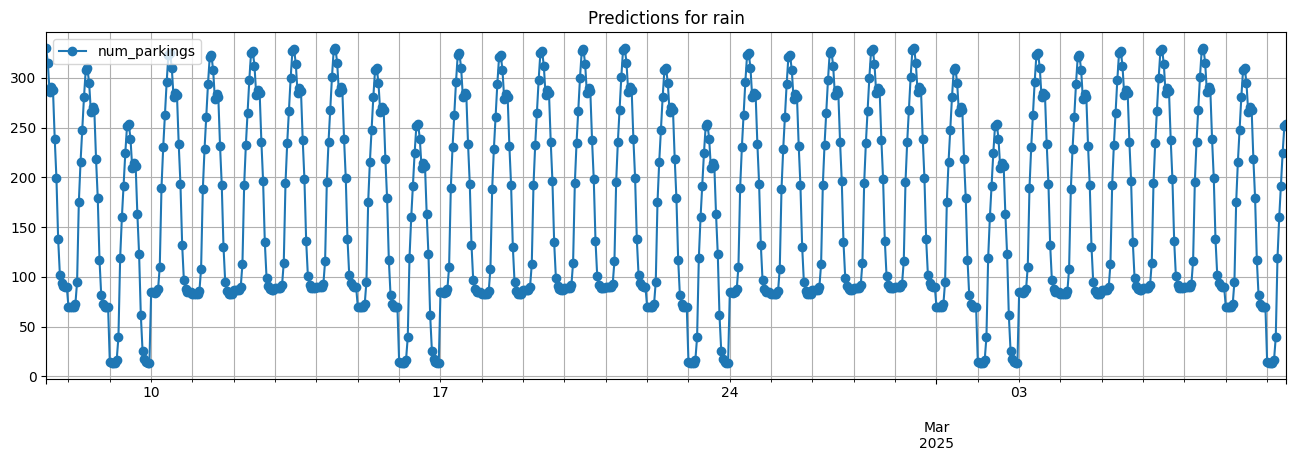

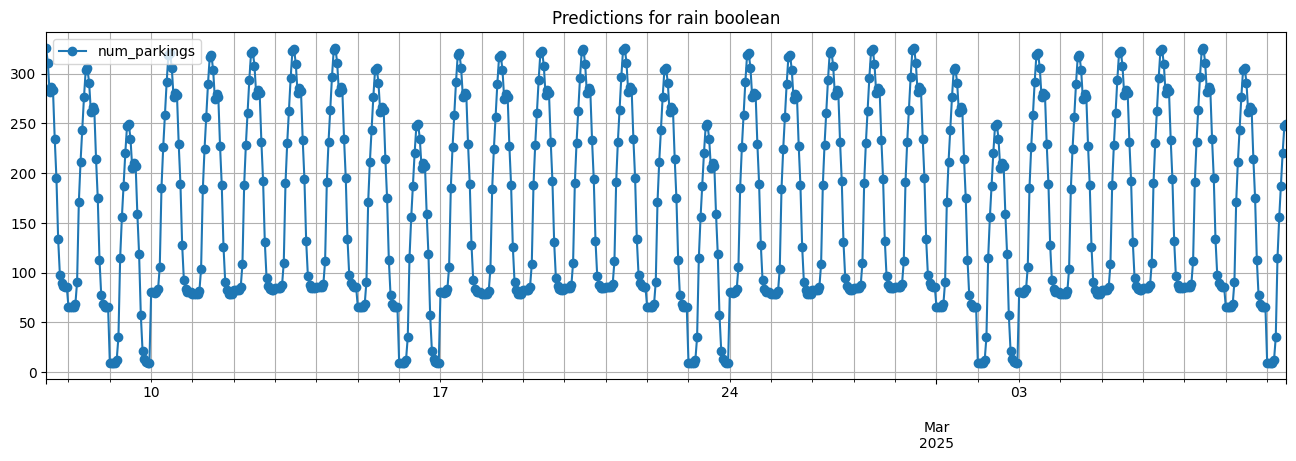

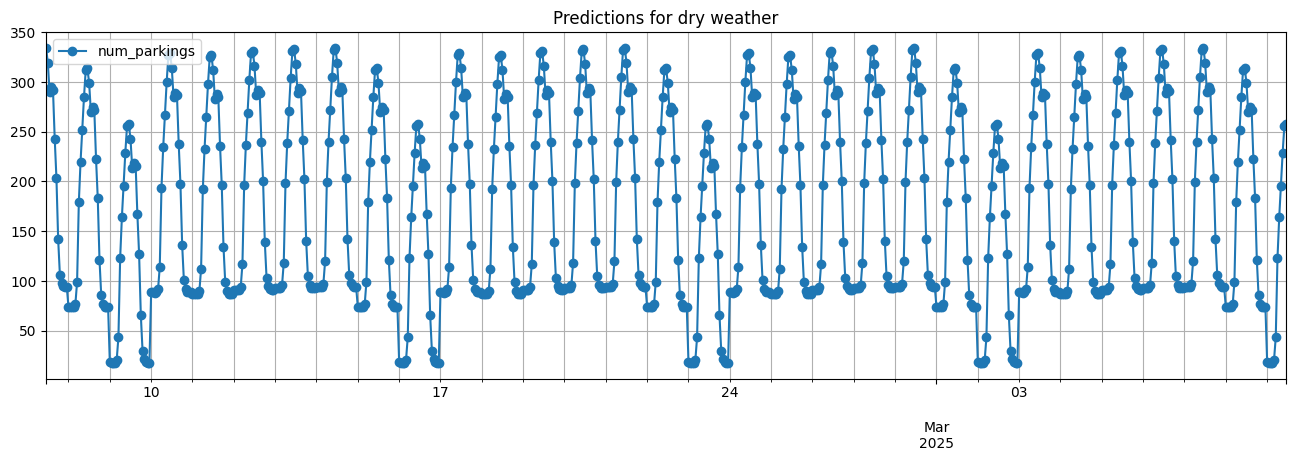

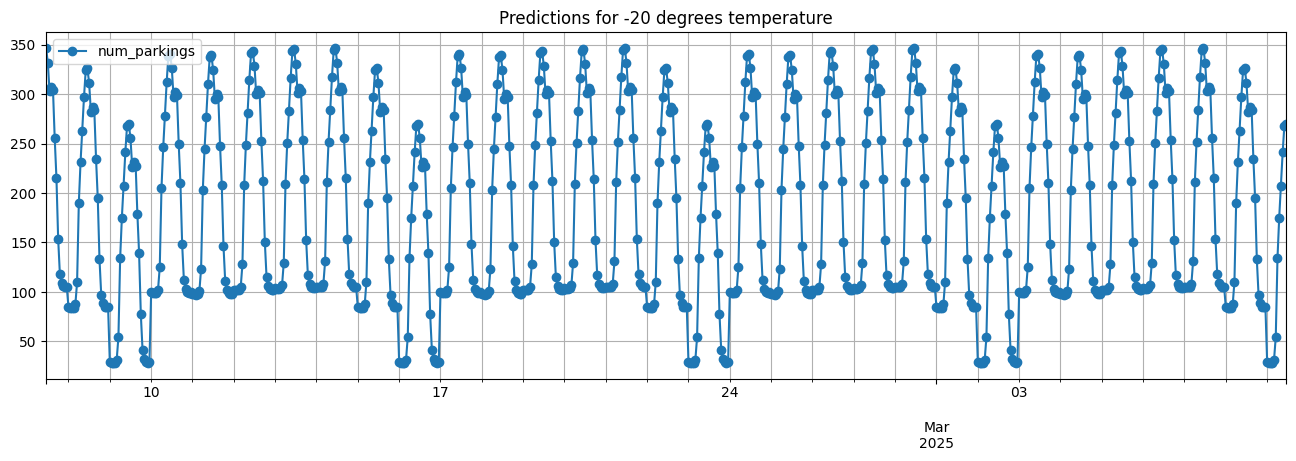

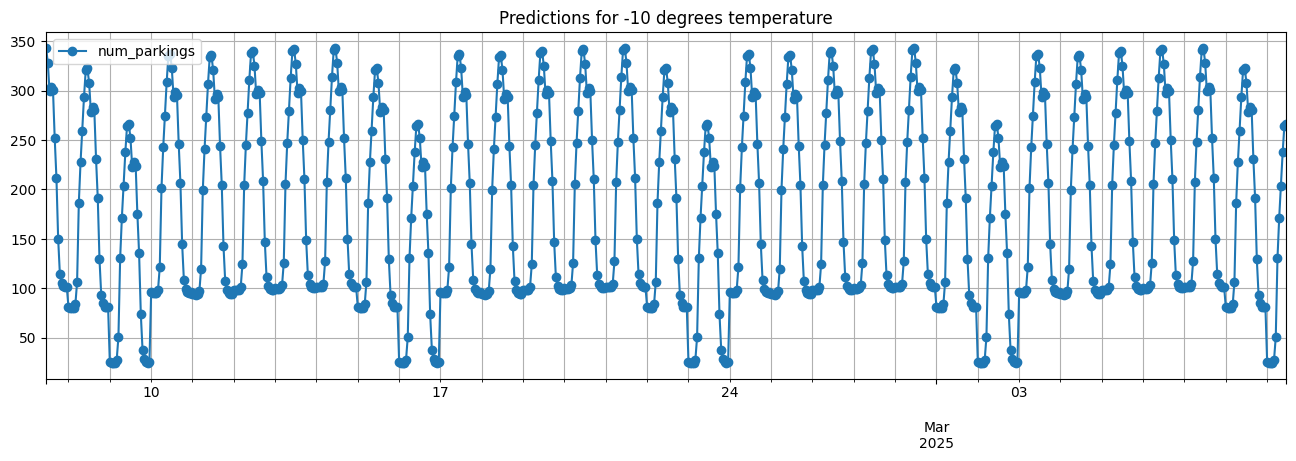

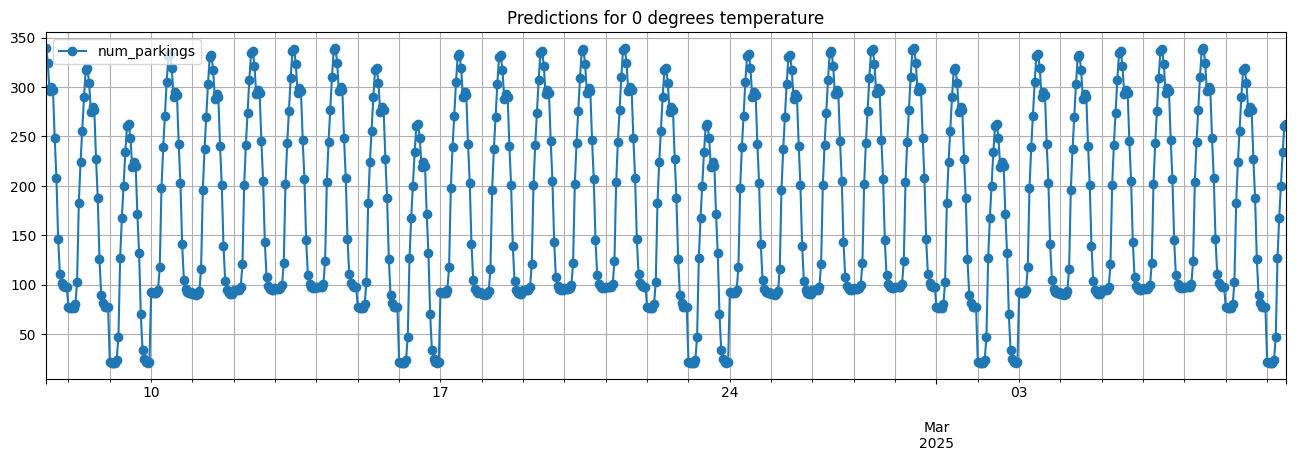

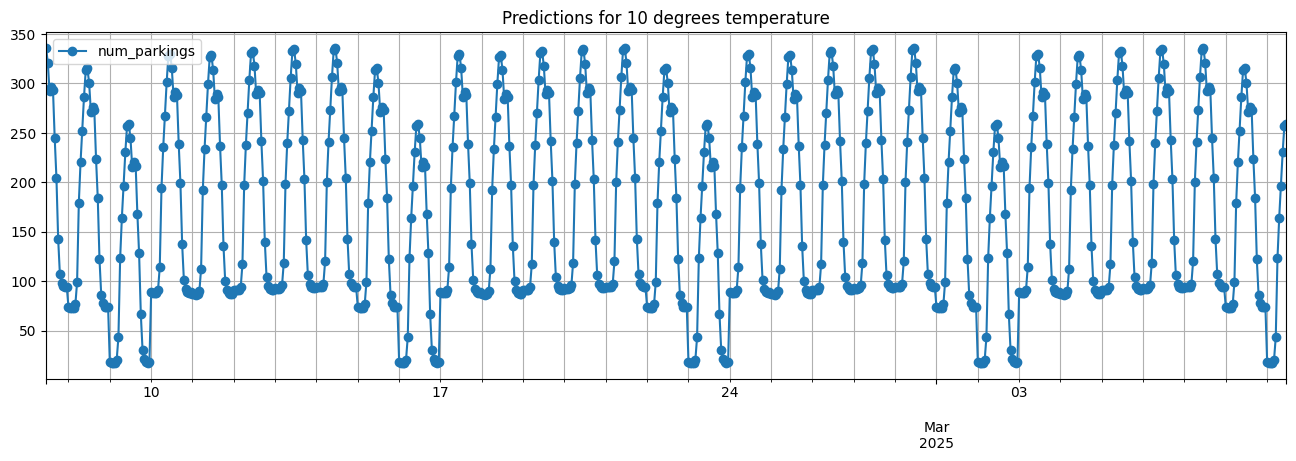

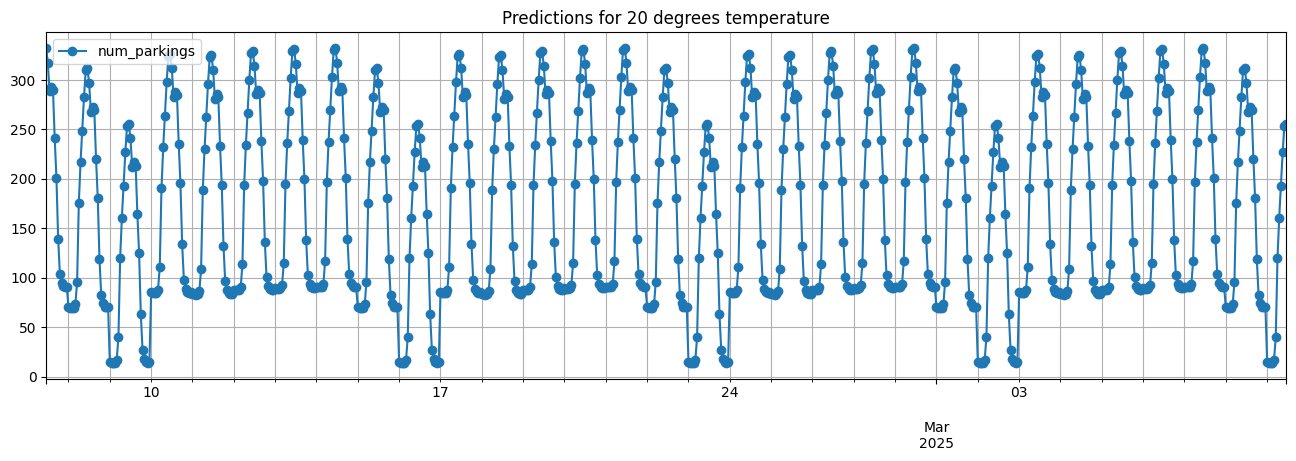

In [5]:
draw_results(results)